In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
df=pd.read_excel('C://Users//demey//Documents//2024-2025//Industry Project//Bariatric Project Study Data 2025_mod.xlsx', sheet_name='Sheet1')

In [51]:
core_X_data=df[['gender', 'age', 'height', 'weight', 'bmi', 'family_hist_cnt', 'chronic_meds_cnt','procedure_category','antibiotics','cholecystectomy_repair','hiatus_hernia_repair']].copy()
cm_cols= [col for col in df.columns if col.startswith('CM_')]

cm_data = df[cm_cols].fillna(0).astype(int)
cm_data
zero_only = [col for col in cm_data.columns if (cm_data[col] == 0).all()]
cm_data = cm_data.drop(columns=zero_only)

# finally, join the filtered CM_ data back into your core set
core_X_data = core_X_data.join(cm_data)
core_X_data.fillna(0, inplace=True)
print(core_X_data.isna().sum())  # should all be zero

# inspect result
print("Dropped CM columns:", zero_only)
print("Remaining columns in CM data:", cm_data.columns.tolist())


gender                    0
age                       0
height                    0
weight                    0
bmi                       0
family_hist_cnt           0
chronic_meds_cnt          0
procedure_category        0
antibiotics               0
cholecystectomy_repair    0
hiatus_hernia_repair      0
CM_AIDS                   0
CM_ANEMDEF                0
CM_ARTH                   0
CM_CHF                    0
CM_DEPRESS                0
CM_DM                     0
CM_DMCX                   0
CM_HTN_C                  0
CM_HYPOTHY                0
CM_LIVER                  0
CM_OBESE                  0
CM_PSYCH                  0
CM_SMOKE                  0
CM_APNEA                  0
CM_CHOLSTRL               0
CM_OSTARTH                0
CM_HPLD                   0
dtype: int64
Dropped CM columns: ['CM_ALCOHOL', 'CM_BLDLOSS', 'CM_CHRNLUNG', 'CM_COAG', 'CM_DRUG', 'CM_LYMPH', 'CM_LYTES', 'CM_METS', 'CM_NEURO', 'CM_PARA', 'CM_PERIVASC', 'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_TUMOR', 'C

In [52]:
# Check whether CM_NEURO survived the filtering
if 'CM_CHF' in core_X_data.columns:
    print("CM_CHF is present in core_X_data!")
else:
    
    print("CM_CHFis NOT in core_X_data.")
if 'CM_DRUG' in core_X_data.columns:
    print("CM_NEURO is present in core_X_data!")
else:
    print("CM_NEURO is NOT in core_X_data.")


CM_CHF is present in core_X_data!
CM_NEURO is NOT in core_X_data.


In [53]:
# Identify all complication-related columns
comp_cols = [col for col in df.columns if 'comp' in col.lower()]

# Create new dataset without the original complication columns
df_new = df.drop(columns=comp_cols)

# Add a single 'complication' column: 1 if any original comp column == 1, else 0
df_new['complication'] = (df[comp_cols] == 1).any(axis=1).astype(int)

# Display new dataset shape
print("New dataset shape (rows, columns):", df_new.shape)

# Show a sample of the new 'complication' column alongside the ID
# Show the first 10 rows of id and complication
print(df_new[['id', 'complication']].head(10))
print("First 15 column names:", df_new.columns.tolist())

New dataset shape (rows, columns): (344, 111)
        id  complication
0  45488.0             0
1      NaN             0
2  37462.0             1
3  40661.0             0
4      NaN             0
5  40699.0             0
6  38920.0             0
7  37827.0             0
8  47189.0             0
9      NaN             0
First 15 column names: ['doctor', 'procedure_category', 'hospitalDesc', 'hospital_wardDesc', 'days_since_admission', 'length_of_stay', 'gender', 'age', 'weight', 'height', 'bmi', 'family_hist_cnt', 'chronic_meds_cnt', 'cm_count', 'morbidity', 'CM_AIDS', 'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH', 'CM_BLDLOSS', 'CM_CHF', 'CM_CHRNLUNG', 'CM_COAG', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_DRUG', 'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_LYMPH', 'CM_LYTES', 'CM_METS', 'CM_NEURO', 'CM_OBESE', 'CM_PARA', 'CM_PERIVASC', 'CM_PSYCH', 'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_SMOKE', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE', 'CM_WGHTLOSS', 'CM_APNEA', 'CM_CHOLSTRL', 'CM_OSTARTH', 'CM_HPLD', 'emergency_

In [54]:
# Missing values analysis
missing_df = pd.DataFrame({
    'Missing_Count': core_X_data.isnull().sum(),
    'Missing_Percentage': (core_X_data.isnull().sum() / len(core_X_data)) * 100
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)
print(f"Columns with missing values: {len(missing_df)}/{core_X_data.shape[1]}")
print(f"Total completeness: {(1 - core_X_data.isnull().sum().sum()/(core_X_data.shape[0]*core_X_data.shape[1]))*100:.1f}%")

if len(missing_df) > 0:
    print("\nTop missing columns:")
    print(missing_df.head(10))
    
    # Visualization
    plt.figure(figsize=(10, 6))
    top_missing = missing_df.head(15)
    plt.barh(range(len(top_missing)), top_missing['Missing_Percentage'], color='coral')
    plt.yticks(range(len(top_missing)), top_missing.index)
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 15 Columns with Missing Values', fontsize=14, fontweight='bold')
    
    for i, v in enumerate(top_missing['Missing_Percentage']):
        plt.text(v + 0.1, i, f'{v:.1f}%', va='center')
    
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")

MISSING VALUES ANALYSIS
Columns with missing values: 0/28
Total completeness: 100.0%
No missing values found!


In [55]:
core_Y_data=df_new[["complication"]]

core_Y_data.head()

,complication
0,0
1,0
2,1
3,0
4,0


In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
X = core_X_data.copy()
y = core_Y_data['complication'].values

# Handle categorical variables first
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Class distribution in training set:")
print(f"No complications: {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"Complications: {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")
print(f"\nClass distribution in test set:")
print(f"No complications: {(y_test==0).sum()} ({(y_test==0).sum()/len(y_test)*100:.1f}%)")
print(f"Complications: {(y_test==1).sum()} ({(y_test==1).sum()/len(y_test)*100:.1f}%)")
X_encoded.head()

Class distribution in training set:
No complications: 248 (90.2%)
Complications: 27 (9.8%)

Class distribution in test set:
No complications: 62 (89.9%)
Complications: 7 (10.1%)


,age,height,weight,bmi,family_hist_cnt,chronic_meds_cnt,cholecystectomy_repair,hiatus_hernia_repair,CM_AIDS,CM_ANEMDEF,...,procedure_category_BPD -DS,procedure_category_Mini gastric bypass (OAGB),procedure_category_RYGBP,procedure_category_SADI,procedure_category_Sleeve,antibiotics_Augmentin,antibiotics_Clindamycin,antibiotics_Invanz,antibiotics_Kefsol,antibiotics_Rocephin
0,50,154,146.0,61.56,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,True,False
1,52,168,96.0,34.00,0,0,1,0,0,0,...,False,False,False,False,True,False,False,False,True,False
2,23,163,143.0,53.82,0,0,0,1,0,0,...,False,False,False,True,False,False,False,False,True,False
3,23,176,120.0,38.74,0,0,0,1,0,0,...,False,False,False,False,True,False,False,False,True,False
4,57,162,112.0,42.68,0,7,0,1,0,0,...,False,False,False,True,False,False,False,False,True,False


In [57]:
# Create baseline model
baseline_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train and evaluate
baseline_pipeline.fit(X_train, y_train)
y_pred_baseline = baseline_pipeline.predict(X_test)
y_pred_proba_baseline = baseline_pipeline.predict_proba(X_test)[:, 1]

print("BASELINE MODEL (No imbalance handling):")
print("="*50)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_baseline):.3f}")

# Confusion matrix
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
print(f"\nConfusion Matrix:")
print(f"TN: {cm_baseline[0,0]}, FP: {cm_baseline[0,1]}")
print(f"FN: {cm_baseline[1,0]}, TP: {cm_baseline[1,1]}")
print(f"Sensitivity (Recall): {cm_baseline[1,1]/(cm_baseline[1,0]+cm_baseline[1,1]):.1%}")
print(f"Specificity: {cm_baseline[0,0]/(cm_baseline[0,0]+cm_baseline[0,1]):.1%}")

BASELINE MODEL (No imbalance handling):

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        62
           1       0.00      0.00      0.00         7

    accuracy                           0.88        69
   macro avg       0.45      0.49      0.47        69
weighted avg       0.81      0.88      0.84        69

ROC-AUC Score: 0.774

Confusion Matrix:
TN: 61, FP: 1
FN: 7, TP: 0
Sensitivity (Recall): 0.0%
Specificity: 98.4%


In [58]:
# Alternative: Using class weights instead of resampling
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weight_dict = {0: class_weights[0], 1: class_weights[1]}

print("Class weights approach:")
print(f"Class 0 weight: {class_weights[0]:.2f}")
print(f"Class 1 weight: {class_weights[1]:.2f}")

# Train model with class weights
weighted_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])

weighted_model.fit(X_train, y_train)
y_pred_weighted = weighted_model.predict(X_test)
y_pred_proba_weighted = weighted_model.predict_proba(X_test)[:, 1]

print("\nClass Weights Model Performance:")
print(classification_report(y_test, y_pred_weighted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_weighted):.3f}")

Class weights approach:
Class 0 weight: 0.55
Class 1 weight: 5.09

Class Weights Model Performance:
              precision    recall  f1-score   support

           0       0.97      0.61      0.75        62
           1       0.20      0.86      0.32         7

    accuracy                           0.64        69
   macro avg       0.59      0.74      0.54        69
weighted avg       0.90      0.64      0.71        69

ROC-AUC: 0.781


Default threshold: 0.5
Optimal threshold: 0.772
F1 at optimal: 0.462


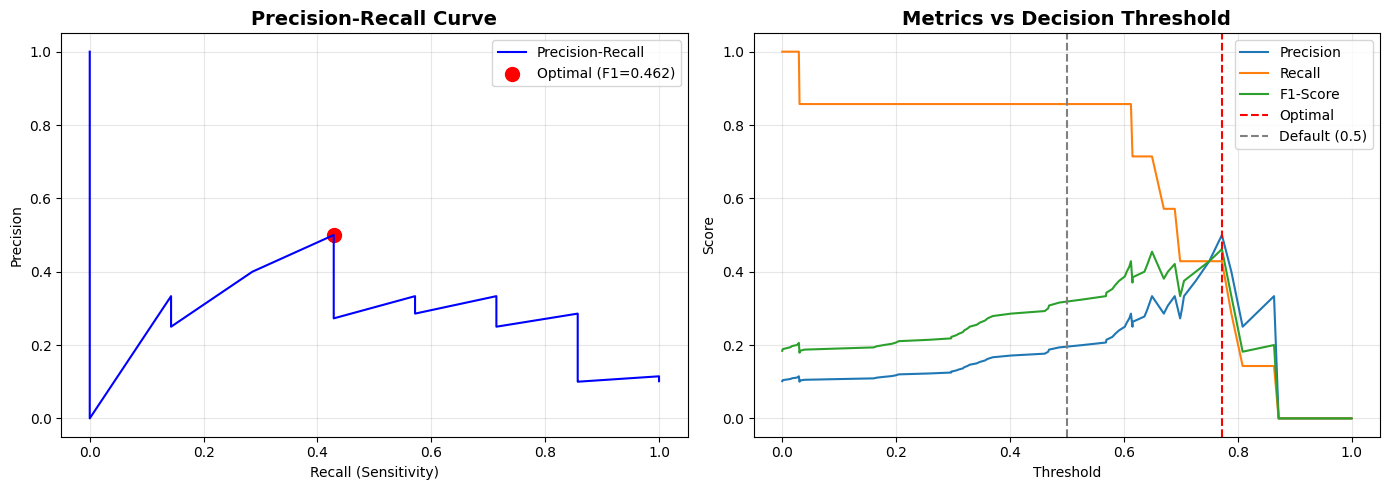


Performance with optimal threshold:
              precision    recall  f1-score   support

           0       0.98      0.76      0.85        62
           1       0.29      0.86      0.43         7

    accuracy                           0.77        69
   macro avg       0.63      0.81      0.64        69
weighted avg       0.91      0.77      0.81        69



In [59]:
from sklearn.metrics import precision_recall_curve

# Get probabilities for class weights model
y_proba = weighted_model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Find optimal threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Default threshold: 0.5")
print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"F1 at optimal: {f1_scores[optimal_idx]:.3f}")

# Plot threshold analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Precision-Recall curve
ax1.plot(recall, precision, 'b-', label='Precision-Recall')
ax1.scatter(recall[optimal_idx], precision[optimal_idx], 
           color='red', s=100, label=f'Optimal (F1={f1_scores[optimal_idx]:.3f})')
ax1.set_xlabel('Recall (Sensitivity)')
ax1.set_ylabel('Precision')
ax1.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Threshold vs Metrics
ax2.plot(thresholds, precision[:-1], label='Precision')
ax2.plot(thresholds, recall[:-1], label='Recall')
ax2.plot(thresholds, f1_scores[:-1], label='F1-Score')
ax2.axvline(x=optimal_threshold, color='red', linestyle='--', label='Optimal')
ax2.axvline(x=0.5, color='gray', linestyle='--', label='Default (0.5)')
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Score')
ax2.set_title('Metrics vs Decision Threshold', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Test with optimal threshold
y_pred_optimal = (y_proba >= 0.61).astype(int)
print("\nPerformance with optimal threshold:")
print(classification_report(y_test, y_pred_optimal))

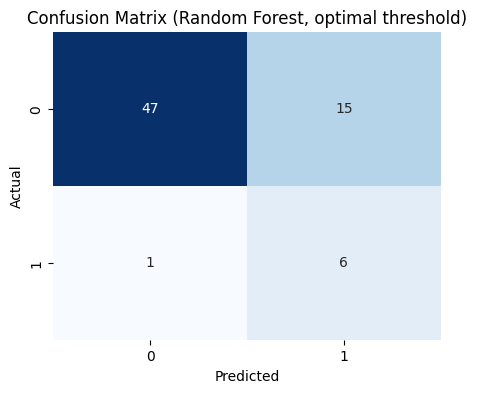

In [60]:
# Display confusion matrix for the latest predictions (y_pred from RandomForest at best threshold)
cm = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest, optimal threshold)')
plt.show()

[LightGBM] [Info] Number of positive: 27, number of negative: 248
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 275, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.352480 -> initscore=-0.608154
[LightGBM] [Info] Start training from score -0.608154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

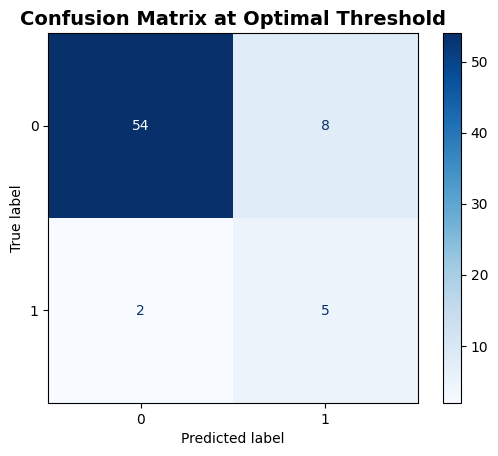

AUC: 0.797


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import (
    classification_report, precision_recall_curve,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

# 🔧 1️⃣ — Preprocessing: fix whitespaces in feature names
X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')

# 🔧 2️⃣ — Logistic Regression (still use class_weight for balance)
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

calibrated_lr = CalibratedClassifierCV(log_reg, method='sigmoid', cv=5)
calibrated_lr.fit(X_train, y_train)

# 🔧 3️⃣ — LightGBM with cost-sensitive class weights
# The magic happens here:
lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    class_weight={0: 1, 1: 5},  # <<< Boost class 1 weight
    random_state=42
)
lgbm.fit(X_train, y_train)

# 🔧 4️⃣ — Weighted model (your own model)
# You load your existing model here:
# weighted_model = YOUR TRAINED MODEL

# 🔧 5️⃣ — Ensemble combining everything
ensemble = VotingClassifier(
    estimators=[
        ('weighted_model', weighted_model),
        ('calibrated_lr', calibrated_lr),
        ('lgbm', lgbm)
    ],
    voting='soft',
    weights=[2, 1, 1]  # Keep weighted_model strong
)

ensemble.fit(X_train, y_train)

# 🔧 6️⃣ — Predict probabilities on test set
y_proba_ensemble = ensemble.predict_proba(X_test)[:, 1]

# 🔧 7️⃣ — Threshold optimization (F1-based)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_ensemble)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"F1 at optimal: {f1_scores[optimal_idx]:.3f}")

# 🔧 8️⃣ — Final evaluation
y_pred_optimal = (y_proba_ensemble >= optimal_threshold).astype(int)

print("\nClassification Report with optimal threshold:")
print(classification_report(y_test, y_pred_optimal, digits=3))

cm = confusion_matrix(y_test, y_pred_optimal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix at Optimal Threshold", fontsize=14, fontweight='bold')
plt.grid(False)
plt.show()

auc = roc_auc_score(y_test, y_proba_ensemble)
print(f"AUC: {auc:.3f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameters found:
{'C': 0.1, 'gamma': 0.01}

Optimal threshold: 0.109
F1 at optimal: 0.455

Classification Report with optimal threshold:
              precision    recall  f1-score   support

           0      0.963     0.839     0.897        62
           1      0.333     0.714     0.455         7

    accuracy                          0.826        69
   macro avg      0.648     0.776     0.676        69
weighted avg      0.899     0.826     0.852        69



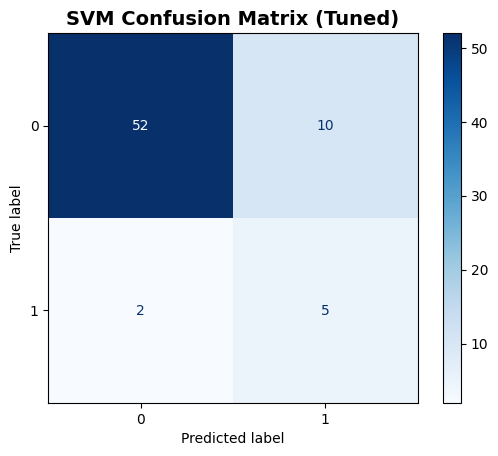

AUC: 0.820


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report, precision_recall_curve,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

# 1️⃣ — Preprocessing whitespaces (still safe)
X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')

# 2️⃣ — Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3️⃣ — Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
}

# 4️⃣ — Setup GridSearch with class_weight balanced
svm = SVC(
    kernel='rbf',
    probability=True,
    class_weight='balanced',
    random_state=42
)

grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='f1',
    cv=5,  # 5-fold CV
    verbose=2,
    n_jobs=-1  # use all cores
)

# 5️⃣ — Fit GridSearch
grid_search.fit(X_train_scaled, y_train)

# 6️⃣ — Best estimator
best_svm = grid_search.best_estimator_

print("\nBest hyperparameters found:")
print(grid_search.best_params_)

# 7️⃣ — Evaluate best model
y_proba_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

# Threshold optimization
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_svm)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"\nOptimal threshold: {optimal_threshold:.3f}")
print(f"F1 at optimal: {f1_scores[optimal_idx]:.3f}")

# Final evaluation
y_pred_optimal = (y_proba_svm >= optimal_threshold).astype(int)

print("\nClassification Report with optimal threshold:")
print(classification_report(y_test, y_pred_optimal, digits=3))

cm = confusion_matrix(y_test, y_pred_optimal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("SVM Confusion Matrix (Tuned)", fontsize=14, fontweight='bold')
plt.grid(False)
plt.show()

auc = roc_auc_score(y_test, y_proba_svm)
print(f"AUC: {auc:.3f}")


[LightGBM] [Info] Number of positive: 27, number of negative: 248
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 275, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.352480 -> initscore=-0.608154
[LightGBM] [Info] Start training from score -0.608154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

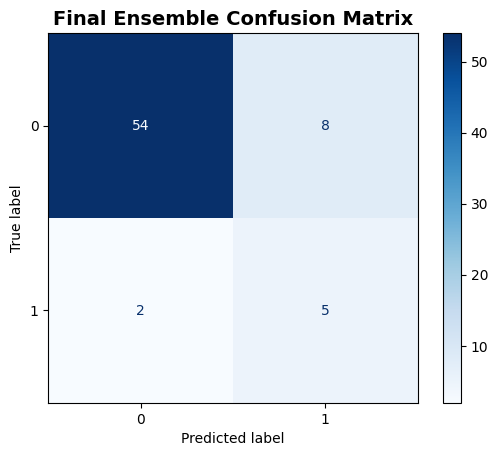

AUC: 0.797


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import (
    classification_report, precision_recall_curve,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

# 1️⃣ — Clean whitespaces in feature names (safe habit)
X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')

# 2️⃣ — Logistic Regression with class_weight for imbalance
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

calibrated_lr = CalibratedClassifierCV(log_reg, method='sigmoid', cv=5)
calibrated_lr.fit(X_train, y_train)

# 3️⃣ — LightGBM with cost-sensitive weighting
lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    class_weight={0: 1, 1: 5},  # adjust if you want stronger recall
    random_state=42
)
lgbm.fit(X_train, y_train)

# 4️⃣ — Your existing weighted_model
# weighted_model = YOUR TRAINED MODEL

# 5️⃣ — Build clean ensemble
ensemble = VotingClassifier(
    estimators=[
        ('weighted_model', weighted_model),
        ('calibrated_lr', calibrated_lr),
        ('lgbm', lgbm)
    ],
    voting='soft',
    weights=[2, 1, 1]  # You can tune these weights if you want to boost forest influence
)

ensemble.fit(X_train, y_train)

# 6️⃣ — Predict probabilities on test set
y_proba_ensemble = ensemble.predict_proba(X_test)[:, 1]

# 7️⃣ — Threshold optimization (F1-based)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_ensemble)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"F1 at optimal: {f1_scores[optimal_idx]:.3f}")

# 8️⃣ — Final evaluation
y_pred_optimal = (y_proba_ensemble >= optimal_threshold).astype(int)

print("\nClassification Report with optimal threshold:")
print(classification_report(y_test, y_pred_optimal, digits=3))

cm = confusion_matrix(y_test, y_pred_optimal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Final Ensemble Confusion Matrix", fontsize=14, fontweight='bold')
plt.grid(False)
plt.show()

auc = roc_auc_score(y_test, y_proba_ensemble)
print(f"AUC: {auc:.3f}")


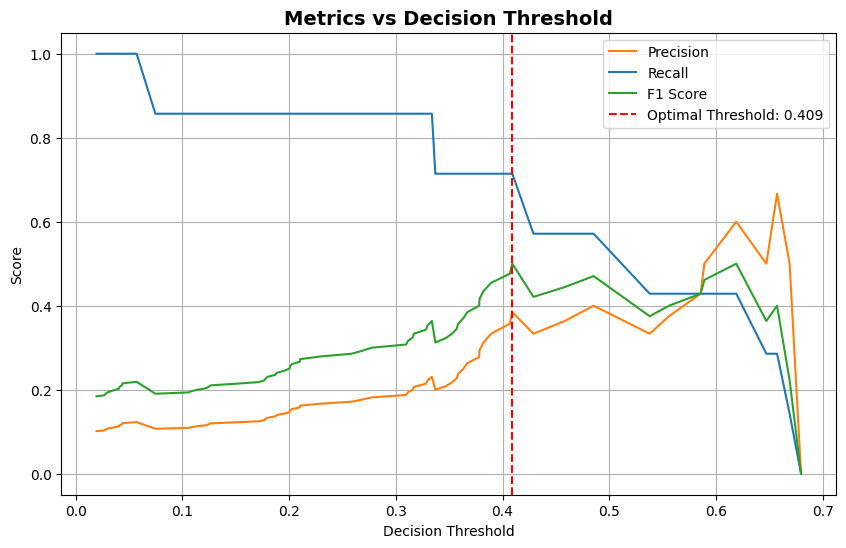

In [64]:
# Metrics vs Threshold plot

plt.figure(figsize=(10, 6))

# Compute F1 again just to be safe
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# Plot all metrics
plt.plot(thresholds, precision[:-1], label="Precision", color='tab:orange')
plt.plot(thresholds, recall[:-1], label="Recall", color='tab:blue')
plt.plot(thresholds, f1_scores[:-1], label="F1 Score", color='tab:green')

# Plot optimal threshold line
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.3f}')

plt.title("Metrics vs Decision Threshold", fontsize=14, fontweight='bold')
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()




Run 1 — Random State 0
[LightGBM] [Info] Number of positive: 27, number of negative: 248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 275, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.352480 -> initscore=-0.608154
[LightGBM] [Info] Start training from score -0.608154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

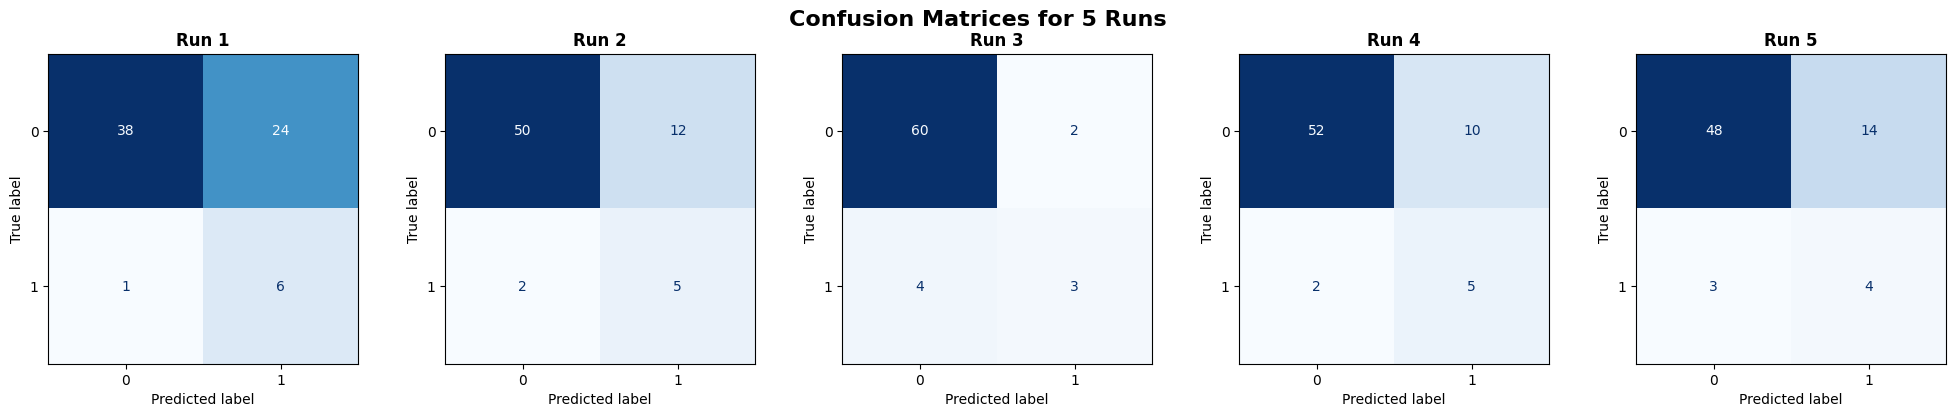


Summary of 5 runs:
   Run  Optimal Threshold        F1  Precision    Recall       AUC
0    1           0.322566  0.324324   0.200000  0.857143  0.682028
1    2           0.440865  0.416667   0.294118  0.714286  0.769585
2    3           0.557410  0.500000   0.600000  0.428571  0.794931
3    4           0.378804  0.454545   0.333333  0.714286  0.762673
4    5           0.334069  0.320000   0.222222  0.571429  0.656682


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, precision_recall_curve,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

# Store results
results = []
confusion_matrices = []

for seed in range(5):
    print(f"\nRun {seed+1} — Random State {seed}")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y, test_size=0.2, random_state=seed, stratify=y
    )

    # Clean column names
    X_train.columns = X_train.columns.str.replace(' ', '_')
    X_test.columns = X_test.columns.str.replace(' ', '_')

    # Weighted logistic regression pipeline
    weighted_model = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
    ])
    weighted_model.fit(X_train, y_train)

    # Calibrated logistic regression
    log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
    log_reg.fit(X_train, y_train)
    calibrated_lr = CalibratedClassifierCV(log_reg, method='sigmoid', cv=5)
    calibrated_lr.fit(X_train, y_train)

    # LightGBM
    lgbm = LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        class_weight={0: 1, 1: 5},
        random_state=42
    )
    lgbm.fit(X_train, y_train)

    # Ensemble
    ensemble = VotingClassifier(
        estimators=[
            ('weighted_model', weighted_model),
            ('calibrated_lr', calibrated_lr),
            ('lgbm', lgbm)
        ],
        voting='soft',
        weights=[2, 1, 1]
    )
    ensemble.fit(X_train, y_train)

    # Predictions
    y_proba_ensemble = ensemble.predict_proba(X_test)[:, 1]

    # Threshold optimization
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba_ensemble)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    auc = roc_auc_score(y_test, y_proba_ensemble)

    # Final predictions
    y_pred_optimal = (y_proba_ensemble >= optimal_threshold).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_optimal)
    confusion_matrices.append((seed+1, cm))

    report = classification_report(y_test, y_pred_optimal, output_dict=True)

    # Store key metrics
    results.append({
        'Run': seed+1,
        'Optimal Threshold': optimal_threshold,
        'F1': f1_scores[optimal_idx],
        'Precision': precision[optimal_idx],
        'Recall': recall[optimal_idx],
        'AUC': auc
    })

# Display confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for idx, (run_num, cm) in enumerate(confusion_matrices):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[idx], cmap='Blues', colorbar=False)
    axes[idx].set_title(f'Run {run_num}', fontsize=12, fontweight='bold')
    axes[idx].grid(False)

plt.suptitle("Confusion Matrices for 5 Runs", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Summary table
results_df = pd.DataFrame(results)
print("\nSummary of 5 runs:")
print(results_df)


[LightGBM] [Info] Number of positive: 34, number of negative: 310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 331
[LightGBM] [Info] Number of data points in the train set: 344, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354167 -> initscore=-0.600774
[LightGBM] [Info] Start training from score -0.600774
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


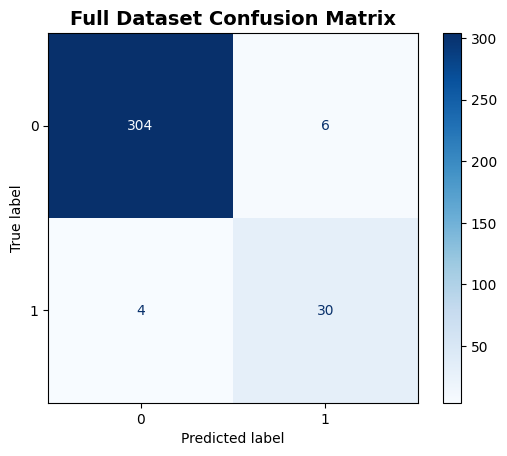

AUC on full data: 0.989


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, precision_recall_curve,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

# ⚠ Ensure feature names are still clean
X_encoded.columns = X_encoded.columns.str.replace(' ', '_')

# ⚠ Combine your existing models into ensemble
ensemble = VotingClassifier(
    estimators=[
        ('weighted_model', weighted_model),
        ('calibrated_lr', calibrated_lr),
        ('lgbm', lgbm)
    ],
    voting='soft',
    weights=[2, 1, 1]
)

# ⚠ Fit ensemble on full dataset (only the voting layer learns, base models stay unchanged)
ensemble.fit(X_encoded, y)

# Predict probabilities on full dataset
y_proba_full = ensemble.predict_proba(X_encoded)[:, 1]

# Threshold optimization
precision, recall, thresholds = precision_recall_curve(y, y_proba_full)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold (full data): {optimal_threshold:.3f}")
print(f"F1 at optimal: {f1_scores[optimal_idx]:.3f}")

# Predictions using optimal threshold
y_pred_full = (y_proba_full >= optimal_threshold).astype(int)

# Classification report
print("\nClassification Report on Full Dataset:")
print(classification_report(y, y_pred_full, digits=3))

# Confusion matrix
cm = confusion_matrix(y, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Full Dataset Confusion Matrix", fontsize=14, fontweight='bold')
plt.grid(False)
plt.show()

# AUC score on full data
auc_full = roc_auc_score(y, y_proba_full)
print(f"AUC on full data: {auc_full:.3f}")
